In [1]:
import pandas as pd
from itertools import chain
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = 'https://raw.githubusercontent.com/EmmS21/SpringboardCapstoneBoxingPredictionWebApp/master/boxingdata/visuals.csv'
data = pd.read_csv(path)

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (39,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,98,99,100,101,102,103,105,106,107,108,109,110,111,112,113,114,159,160,161,162,163,164,166,167,168,169,170,171,172,173,174,175,219,220,221,222,223,224,226,227,228,229,230,231,232,233,234,235,341,342,343,344,345,346,348,349,350,351,352,353,354,355,356,357,396,400,401,402,403,404,405,407,408,409,410,411,412,413,414,415,416,461,462,463,464,465,466,468,469,470,471,472,473,474,475,476,477,520,521,522,523,524,525,527,528,529,530,531,532,533,534,535,536,576,577,578,579,580,581,582,583,584,585,587,588,589,590,591,592,593,594,595,638,639,640,641,642,643,645,646,647,648,649,650,651,652,653,696,697,698,699,700,701,703,704,705,706,707,708,709,710,711,754,755,756,757,758,759,761,762,763,764,765,766,767,768,769,812,813,814,815,816,817,819,820,821,822,823,824,825,826,827,870,871,872,873,874,875,877,878,879,880,881,882,883,884,885,987,988,989,990,991,99

In [2]:
#convert to long so I have a row for each bout
cols = ['secondBoxer'+str(i) for i in range(1, 85)]
two = ['secondBoxerWeight'+str(i) for i in range(1,85)]
three = ['secondBoxerLast6'+str(i) for i in range(1,85)]
four = ['secondBoxerRating'+str(i) for i in range(1,85)]
five = ['secondBoxerRecord'+str(i) for i in range(1,85)]
six = ['metadata'+str(i) for i in range(1,85)]
seven = ['numberofrounds'+str(i) for i in range(1,85)]
eight = ['referee'+str(i) for i in range(1,85)]
nine = ['JudgeID'+str(i) for i in range(1,85)]
ten = ['firstBoxerWeight'+str(i) for i in range(1,85)]
eleven = ['firstBoxerRating'+str(i) for i in range(1,85)]
twelve = ['rating'+str(i) for i in range(1,85)]
thirteen = ['titles'+str(i) for i in range(1,85)]
fourteen = ['date'+str(i) for i in range(1,85)]
fifteen = ['outcome'+str(i) for i in range(1,85)]
# concated = pd.concat([pd.melt(data,id_vars=['name','global_id'],value_vars=cols,var_name='labels',value_name='opposition') for i in cols])
concated = pd.melt(data,id_vars=['name','global_id','sex','division'], value_vars = cols,var_name='label',value_name='opposition')
concated_two = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=two,var_name='weightb_label',value_name='opp_weight').drop(columns=['global_id','name','sex','division'])
concated_three = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=three,var_name='last6_label',value_name='opp_last6').drop(columns=['global_id','name','sex','division'])
concated_four = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=four,var_name='rating_label',value_name='opp_rating').drop(columns=['global_id','name','sex','division'])
concated_five = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=five,var_name='record_label',value_name='opp_record').drop(columns=['global_id','name','sex','division'])
concated_six = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=six,var_name='meta_label',value_name='meta').drop(columns=['global_id','name','sex','division'])
concated_seven = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=seven,var_name='rounds_label',value_name='rounds').drop(columns=['global_id','name','sex','division'])
concated_eight = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=eight,var_name='ref_label',value_name='ref').drop(columns=['global_id','name','sex','division'])
concated_nine = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=nine,var_name='judge_label',value_name='judge').drop(columns=['global_id','name','sex','division'])
concated_ten = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=ten,var_name='weighta_label',value_name='weight').drop(columns=['global_id','name','sex','division'])
concated_eleven = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=eleven,var_name='boxerratinga_label',value_name='boxer_rating').drop(columns=['global_id','name','sex','division'])
concated_twelve = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=twelve,var_name='rate_label',value_name='rating').drop(columns=['global_id','name','sex','division'])
concated_thirteen = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=thirteen,var_name='title_label',value_name='titles').drop(columns=['global_id','name','sex','division'])
concated_fourteen = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=fourteen,var_name='date_label',value_name='date').drop(columns=['global_id','name','sex','division'])
concated_fifteen = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=fifteen,var_name='outcome_label',value_name='outcome').drop(columns=['global_id','name','sex','division'])
#merge all 
fully_merged = pd.concat([concated,concated_two,concated_three,concated_four,concated_five,
          concated_six,concated_seven,concated_eight,concated_nine,concated_ten,
          concated_eleven,concated_twelve,concated_thirteen,concated_fourteen,concated_fifteen],axis=1,sort=False)
fully_merged = fully_merged.set_index('name')
# fully_merged.index = fully_merged['name']

In [3]:
fully_merged = fully_merged.reset_index()
fully_merged = fully_merged.drop(columns = ['weightb_label','last6_label','rating_label','record_label','meta_label',
                            'rounds_label','ref_label','judge_label','weighta_label','boxerratinga_label',
                            'rate_label','title_label','date_label','outcome_label','label'],axis=1)

In [4]:
#reordering columns
column_titles = ['name','weight','boxer_rating','sex','division','global_id','rating','date','outcome','opposition',
                 'opp_last6','opp_rating','opp_record','opp_weight','judge','meta','rounds','ref','titles']
fully_merged = fully_merged.reindex(columns=column_titles)

In [5]:
#cleanup data
fully_merged['outcome'] = fully_merged['outcome'].str.replace('"','')
fully_merged['opposition'] = fully_merged['opposition'].str.replace('"','')
fully_merged['weight'] = fully_merged['weight'].fillna(0).astype(int)
#converting last 6 fights to points
fully_merged['opp_last6'] = fully_merged.opp_last6.str.count('win')*10+fully_merged.opp_last6.str.count('draw')*5+fully_merged.opp_last6.str.count('loss')*-5

In [6]:
#converting opp record to points
fully_merged['opp_win'] = fully_merged['opp_record'].str.extract('win(?P<win>.*?)}').fillna(0)
fully_merged['opp_loss'] = fully_merged['opp_record'].str.extract('loss(?P<loss>.*?)win').fillna(0)
fully_merged['opp_draw'] = fully_merged['opp_record'].str.extract('draw"(?P<draw>.*?)loss').fillna(0)
fully_merged['opp_loss'] =  pd.to_numeric(fully_merged['opp_loss'],errors='coerce')
fully_merged['opp_win'] = pd.to_numeric(fully_merged['opp_win'],errors='coerce')
fully_merged['opp_draw'] = pd.to_numeric(fully_merged['opp_draw'],errors='coerce')
fully_merged.drop(columns=['opp_record'],inplace=True)

In [7]:
#droppin columns with non useful data
fully_merged.drop(columns=['boxer_rating','opp_rating'],inplace=True)

In [8]:
fully_merged['opp_weight'] = fully_merged['opp_weight'].astype(float)
fully_merged['date'] = pd.to_datetime(fully_merged['date'])
ref_points =fully_merged.judge.str.extractall(r'(\b\d+\b)').unstack().reindex(fully_merged.index)      
ref_points.columns = ref_points.columns.map('{0[0]}_{0[1]}'.format)
fully_merged[['judge1boxer','judge1opp','judge2boxer','judge2opp','judge3boxer','judge3opp']] = ref_points[['0_0','0_1','0_2','0_3','0_4','0_5']]

In [9]:
fully_merged[['judge1boxer','judge1opp','judge2boxer','judge2opp','judge3boxer','judge3opp']]=fully_merged[['judge1boxer','judge1opp','judge2boxer','judge2opp','judge3boxer','judge3opp']].fillna(0)

In [10]:
fully_merged.drop(columns=['judge'],inplace=True)

In [11]:
fully_merged['ref'] = fully_merged.ref.str.replace(r"[\"\',]", '').str.replace('[','').str.replace(']','')
fully_merged['final_outcome'] = fully_merged['ref']
fully_merged.drop(columns=['ref'],inplace=True)

In [12]:
#extract rounds
rounds =fully_merged.rounds.str.extractall(r'(\b\d+\b)').unstack().reindex(fully_merged.index)
rounds.columns = rounds.columns.map('{0[0]}|{0[1]}'.format)
fully_merged[['rounds1','rounds2']] = rounds[['0|0', '0|1']]
fully_merged.drop(columns=['rounds'],inplace=True)

In [13]:
#converting meta to time
fully_merged['meta'] = fully_merged['meta'].str.replace(':','')
fully_merged['meta'] = fully_merged['meta'].str[0].fillna(0).astype(int)*60 + fully_merged['meta'].str[1:4].fillna(0).astype(int)
#cleaning up titles column
fully_merged['titles'] = fully_merged['titles'].str.replace(r"[\:\,\[\}\]]", '')
#not sure how the information in titles is structured? so dropping column for now
fully_merged.drop(columns=['titles'],inplace=True)

In [14]:
fullym_merged2 = fully_merged.drop(columns=['outcome','global_id','name'])

In [16]:
X = fully_merged.drop(['final_outcome','name','sex','division','opposition','outcome','global_id'],axis=1)
X.fillna(0,inplace=True)
#need to encode strings as numeric features by using preprocessing module sklearn.preprocessing.LabelEncoder 

In [17]:
conditions = [(fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'draw MD majority decision'),
             (fully_merged['final_outcome'] == 'win SD split decision'),(fully_merged['final_outcome'] == 'win TKO technical knockout'),
              (fully_merged['final_outcome'] == 'win nan null'),(fully_merged['final_outcome'] == 'loss UD unanimous decision'),
              (fully_merged['final_outcome'] == 'win UD unanimous decision'),(fully_merged['final_outcome'] == 'loss KO knockout'),
              (fully_merged['final_outcome'] == 'loss TKO technical knockout'),(fully_merged['final_outcome'] == 'loss SD split decision'),
              (fully_merged['final_outcome'] == 'loss nan null'),(fully_merged['final_outcome'] == 'win PTS null'),
              (fully_merged['final_outcome'] == 'unknown nan null'),(fully_merged['final_outcome'] == 'loss RTD corner retirement'),
              (fully_merged['final_outcome'] == 'loss MD majority decision'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout')
             ]

In [18]:
# create new outcomes column
fully_merged.loc[(fully_merged['final_outcome'].str.contains('win KO') == True) | (fully_merged['final_outcome'].str.contains('win TKO') == True), 'clean_outcome'] = 'Win KO'
fully_merged.loc[fully_merged['final_outcome'].str.contains('draw') == True, 'clean_outcome'] = 'Draw'
fully_merged.loc[(fully_merged['final_outcome'].str.contains('win nan') == True) | (fully_merged['final_outcome'].str.contains('win DQ') == True) | (fully_merged['final_outcome'].str.contains('win PTS') == True) | (fully_merged['final_outcome'].str.contains('win DQ') == True) | (fully_merged['final_outcome'].str.contains('win UD') == True) | (fully_merged['final_outcome'].str.contains('win SD') == True) | (fully_merged['final_outcome'].str.contains('win MD') == True) | (fully_merged['final_outcome'].str.contains('win TD') == True) | (fully_merged['final_outcome'].str.contains('win RTD') == True), 'clean_outcome'] = 'Win Other'
fully_merged.loc[fully_merged['final_outcome'].str.contains('win TKO') == True, 'clean_outcome'] = 'Win TKO'
fully_merged.loc[(fully_merged['final_outcome'].str.contains('loss KO') == True) | (fully_merged['final_outcome'].str.contains('loss TKO')), 'clean_outcome'] = 'Loss KO'
fully_merged.loc[fully_merged['final_outcome'].str.contains('scheduled') == True, 'clean_outcome'] = 'Scheduled'
fully_merged.loc[(fully_merged['final_outcome'].str.contains('loss UD') == True) | (fully_merged['final_outcome'].str.contains('loss SD') == True) | (fully_merged['final_outcome'].str.contains('loss nan') == True) | (fully_merged['final_outcome'].str.contains('loss RTD') == True) | (fully_merged['final_outcome'].str.contains('loss MD') == True) | (fully_merged['final_outcome'].str.contains('loss DQ') == True) | (fully_merged['final_outcome'].str.contains('loss PTS') == True) | (fully_merged['final_outcome'].str.contains('loss TD')), 'clean_outcome'] = 'Loss Other'
fully_merged.loc[fully_merged['final_outcome'].str.contains('unknown') == True, 'clean_outcome'] = 'Unknown'

In [19]:
fully_merged.drop(columns=['final_outcome','outcome'],inplace=True)

In [133]:
list(dataset)

['name',
 'weight',
 'sex',
 'division',
 'global_id',
 'rating',
 'date',
 'opposition',
 'opp_last6',
 'opp_weight',
 'meta',
 'opp_win',
 'opp_loss',
 'opp_draw',
 'judge1boxer',
 'judge1opp',
 'judge2boxer',
 'judge2opp',
 'judge3boxer',
 'judge3opp',
 'rounds1',
 'rounds2',
 'clean_outcome',
 'gender+division',
 'Draw',
 'Loss KO',
 'Loss Other',
 'Win KO',
 'Win Other',
 'Win TKO',
 'fight_count',
 'judge1avg',
 'judge2avg',
 'judge3avg',
 'judge1againstavg',
 'judge2againstavg',
 'judge3againstavg']

In [20]:
dataset = fully_merged[(fully_merged['clean_outcome'].notna()) & (fully_merged['clean_outcome'] != 'Unknown') & (fully_merged['clean_outcome'] != 'Scheduled')]

In [134]:
fully_merged['gender+division'] = fully_merged['sex'].astype(str) +' '+ fully_merged['division'].astype(str)
dataset = fully_merged[(fully_merged['clean_outcome'].notna()) & (fully_merged['clean_outcome'] != 'Unknown') & (fully_merged['clean_outcome'] != 'Scheduled')]
#categorical to numerical
dataset.loc[(dataset['clean_outcome'] == 'Win KO'), 'clean_outcome'] = 1
dataset.loc[(dataset['clean_outcome'] == 'Draw'), 'clean_outcome'] = 2
dataset.loc[(dataset['clean_outcome'] == 'Win Other'), 'clean_outcome'] = 3
dataset.loc[(dataset['clean_outcome'] == 'Win TKO'), 'clean_outcome'] = 4
dataset.loc[(dataset['clean_outcome'] == 'Loss Other'), 'clean_outcome'] = 5
dataset.loc[(dataset['clean_outcome'] == 'Loss KO'), 'clean_outcome'] = 6
#added win percentages for each boxer
ltd = dataset.groupby(['name','clean_outcome']).size().unstack(fill_value=0)
ltd = ltd.reset_index()
ltd['fight_count'] = ltd.sum(axis=1)
ltd[['Draw','Loss KO','Loss Other','Win KO','Win Other','Win TKO']]=ltd[[1,2,3,4,5,6]].div(ltd.fight_count, axis=0)
dataset = dataset.merge(ltd[['name','Draw','Loss KO','Loss Other','Win KO','Win Other','Win TKO','fight_count']],on='name')
#average judge score cards per fight
dataset[['judge1boxer','judge2boxer','judge3boxer']] = dataset[['judge1boxer','judge2boxer','judge3boxer']].astype(int)
dataset[['judge1opp','judge2opp','judge3opp']] = dataset[['judge1opp','judge2opp','judge3opp']].astype(int)
n=dataset.groupby(by=['name'])['judge1boxer','judge2boxer','judge3boxer'].sum()
n.rename(columns={'judge1boxer':'judge1avg','judge2boxer':'judge2avg','judge3boxer':'judge3avg'},inplace=True)
m = dataset.groupby(by=['name'])['judge1opp','judge2opp','judge3opp'].sum()
m.rename(columns={'judge1opp':'judge1againstavg','judge2opp':'judge2againstavg','judge3opp':'judge3againstavg'},inplace=True)
dataset = dataset.merge(n,on='name').merge(m,on='name')
dataset[['judge1avg','judge2avg','judge3avg','judge1againstavg','judge2againstavg','judge3againstavg']] = dataset[['judge1avg','judge2avg','judge3avg','judge1againstavg','judge2againstavg','judge3againstavg']].div(dataset.fight_count, axis=0)
#added win percentage for each opponent through a self join
dataset2 = dataset.merge(dataset[['name','Draw','Loss KO','Loss Other','Win KO','Win Other','Win TKO','fight_count','judge1avg','judge2avg','judge3avg','judge1againstavg','judge2againstavg','judge3againstavg']], left_on='opposition',right_on='name',suffixes=('a','opp')).drop(columns=['nameopp'])
# I want to stratify the test_train split by gender and division to ensure all are equally represented, starting off by concatenating gender & division
strat = dataset['gender+division'] 
X = dataset.drop(['clean_outcome','judge1opp','judge2boxer','judge2opp','judge3boxer','judge3opp','name','sex','division','opposition','gender+division','global_id','date'],axis=1) 
X = X.fillna(0)
X.loc[X['rating'] == 'null ', 'rating'] = 0
y = dataset['clean_outcome']
y = y.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=strat)
#building the model, starting off by looking for the best parameters
params = {
    'n_estimators':[i for i in range(1,201,50)],
    'max_depth':[i for i in range(1,10,2)]
}
n_estimators = [i for i in range(0,201,20)]
rfc = RandomForestClassifier()
gridsearch = GridSearchCV(rfc,param_grid=params,cv=10,scoring='f1_weighted',n_jobs=4)
gridsearch.fit(X_train,y_train)
bestparams = gridsearch.best_params_

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [135]:
rc = RandomForestClassifier(**bestparams)
rc.fit(X_train,y_train)
preds = rc.predict(X_test)

In [136]:
score = accuracy_score(y_test,preds)
score

0.7634730538922155

In [29]:
#kfold cross validation
kfold = KFold(n_splits=5)
results = cross_val_score(rc,X_train,y_train,cv=kfold)
results

array([0.92952007, 0.92627528, 0.9260489 , 0.92899185, 0.92793541])

Text(0.5, 87.0, 'Predicted')

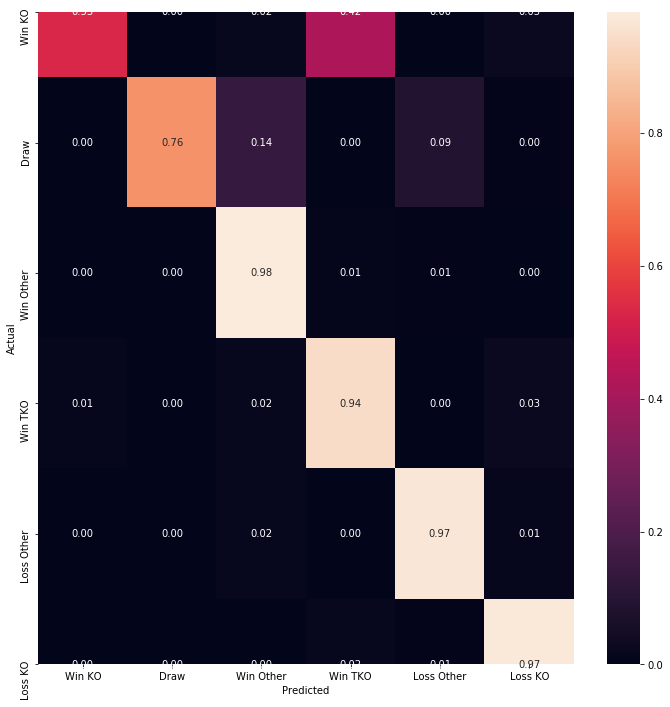

In [31]:
# labels = np.unique([y_test,preds])
labels = ['Win KO','Draw','Win Other','Win TKO','Loss Other','Loss KO']        
c = confusion_matrix(y_test,preds)
#normalize
cm = c.astype('float')/c.sum(axis=1)[:, np.newaxis]
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(cm,annot=True, fmt= '.2f',xticklabels=labels,yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
# plt.show(block=False)

([<matplotlib.axis.YTick at 0x2b905b55e08>,
 <a list of 30 Text yticklabel objects>)

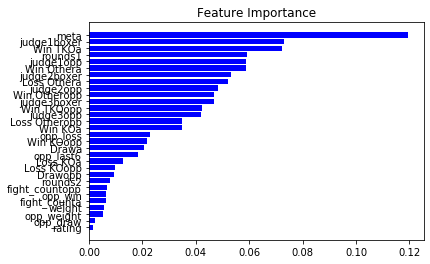

In [62]:
#feature importance
important = rc.feature_importances_
indice = np.argsort(important)
plt.title('Feature Importance')
plt.barh(range(len(indice)),important[indice],color='b',align='center')
plt.yticks(range(len(indice)), [X.columns[i] for i in indice])


In [53]:
indice

array([ 1,  7,  3,  0, 22,  5, 29, 15, 23, 24, 17,  2, 16, 26,  6, 19, 25,
       13, 28, 12, 27, 11, 18, 10, 20,  9, 14, 21,  8,  4], dtype=int64)

In [61]:
X.columns[1]


'rating'

In [47]:
from sklearn.datasets import load_iris
r = load_iris()
r['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
r

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  